In [4]:
import numpy as np
import matplotlib as plt
import csv
import os
import re
import pandas as pd


In [5]:
#A function to get file name and out put file names and legend labels
def getfilename():
    path = os.getcwd()    
    filewithext = []
    filename = []
    for file in [doc for doc in os.listdir(path) if doc.endswith('.DTA')]:  
        filewithext.append(file)
        filename.append(file.replace(".DTA",""))
    return(filewithext, filename)
#A function converts scientific notationed numbers to floats
def convert_to_float(s):
    try:
        s[x_tag] = float(s[x_tag])
        s[y_tag] = float(s[y_tag])
        return s
    except:
        return s
def eis_freq_convert_to_float(s):
    try:
        s[freq_tag] = float(s[freq_tag])
        return s
    except:
        return s
#A function return a columns of the result of a truth table
#which x_rag and y_tag column should both be numerical values
def is_numerical(s):
    try:
        result = isinstance(s[x_tag], float) and isinstance(s[y_tag], float)
        return result
    except:
        return False

def add_lsv_plot(lsv):
    lsv.plot(ax=ax, 
          x='ref',
          y='normA',
          title  = 'LSV',
          xlim = (-1,0),
          ylim = (-10, 0))

In [6]:
filenameext, filename = getfilename()
filenameext
df = pd.read_csv(filenameext[0])
df = df['EXPLAIN'].str.split(r"\t", expand=True)
# df.iloc[40:60]
header_pos = df[df[1]=='Pt'].index.values
df.rename(columns=df.iloc[header_pos[0]], inplace = True)
header_ls = list(df.iloc[header_pos[0]])
unit_ls = list(df.iloc[header_pos[0]+1])
raw = df.iloc[header_pos[0]+2:]
raw = raw[['Zreal','Zimag','Freq']]

#df.rename(columns=df.iloc[pos])

In [7]:
x_tag = 'Zreal'
y_tag = 'Zimag'
freq_tag = 'Freq'
sample='test'

raw[[x_tag, y_tag]] = raw[[x_tag, y_tag]].apply(convert_to_float, axis= 1)
raw[[freq_tag]] = raw[[freq_tag]].apply(eis_freq_convert_to_float, axis= 1)
raw['|Zimag|'] = raw['Zimag'].abs()
EIS = raw

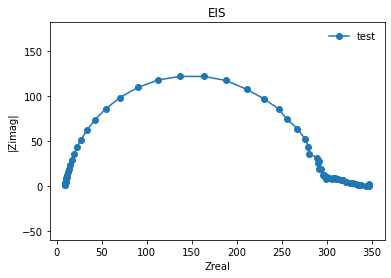

In [8]:
ax = EIS.plot(style = '-o',
              x='Zreal',
              y='|Zimag|',
              title  = 'EIS'
             )
ax.set(xlabel='Zreal', ylabel='|Zimag|')

#add_lsv_plot(lsv2)
#add_lsv_plot(lsv3)

ax.legend([sample],frameon=False)
ax.axis('equal')
ax.figure.savefig(sample + 'EIS.png')